In [1]:
import gpflow
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import sys
sys.path.append('../')
from GPHetero import hetero_kernels, hetero_likelihoods, hetero_gpmc

RuntimeError: module compiled against API version 0xb but this version of numpy is 0xa

RuntimeError: module compiled against API version 0xb but this version of numpy is 0xa

Text(0,0.5,u'$y$')

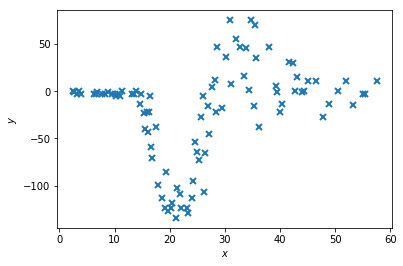

In [2]:
data = np.loadtxt('../data/motor.dat')
X = data[:, 0][:, None]
Xm = np.mean(X)
Xv = np.std(X)
Xnorm = (X - Xm)/Xv
Y = data[:, 1]
fig, ax = plt.subplots()
ax.plot(X, Y, 'x', markeredgewidth=2)
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')

In [3]:
#build the model
k1 = hetero_kernels.RBF(1)
k2 = hetero_kernels.RBF(1)
k3 = hetero_kernels.RBF(1)
m = hetero_gpmc.GPMCAdaptive(Xnorm, Y[:,None], k1, k2, k3)

In [4]:
m

Name,values,prior,constraint
adaptive_gp.V1,[[ 0.] [ 0.] [ 0.] [ 0.] [ 0.] [ 0.] [ 0.] [ 0.] [ 0.] [ 0.] [ 0.] [ 0.] [ 0.] [ 0.] [ 0.] [ 0.] [ 0.] [ 0.] [ 0.] [ 0.] [ 0.] [ 0.] [ 0.] [ 0.] [ 0.] [ 0.] [ 0.] [ 0.] [ 0.] [ 0.] [ 0.] [ 0.] [ 0.] [ 0.] [ 0.] [ 0.] [ 0.] [ 0.] [ 0.] [ 0.] [ 0.] [ 0.] [ 0.] [ 0.] [ 0.] [ 0.] [ 0.] [ 0.] [ 0.] [ 0.] [ 0.] [ 0.] [ 0.] [ 0.] [ 0.] [ 0.] [ 0.] [ 0.] [ 0.] [ 0.] [ 0.] [ 0.] [ 0.] [ 0.] [ 0.] [ 0.] [ 0.] [ 0.] [ 0.] [ 0.] [ 0.] [ 0.] [ 0.] [ 0.] [ 0.] [ 0.] [ 0.] [ 0.] [ 0.] [ 0.] [ 0.] [ 0.] [ 0.] [ 0.] [ 0.] [ 0.] [ 0.] [ 0.] [ 0.] [ 0.] [ 0.] [ 0.] [ 0.] [ 0.]],"N([ 0.],[ 1.])",(none)
adaptive_gp.V2,[[ 0.] [ 0.] [ 0.] [ 0.] [ 0.] [ 0.] [ 0.] [ 0.] [ 0.] [ 0.] [ 0.] [ 0.] [ 0.] [ 0.] [ 0.] [ 0.] [ 0.] [ 0.] [ 0.] [ 0.] [ 0.] [ 0.] [ 0.] [ 0.] [ 0.] [ 0.] [ 0.] [ 0.] [ 0.] [ 0.] [ 0.] [ 0.] [ 0.] [ 0.] [ 0.] [ 0.] [ 0.] [ 0.] [ 0.] [ 0.] [ 0.] [ 0.] [ 0.] [ 0.] [ 0.] [ 0.] [ 0.] [ 0.] [ 0.] [ 0.] [ 0.] [ 0.] [ 0.] [ 0.] [ 0.] [ 0.] [ 0.] [ 0.] [ 0.] [ 0.] [ 0.] [ 0.] [ 0.] [ 0.] [ 0.] [ 0.] [ 0.] [ 0.] [ 0.] [ 0.] [ 0.] [ 0.] [ 0.] [ 0.] [ 0.] [ 0.] [ 0.] [ 0.] [ 0.] [ 0.] [ 0.] [ 0.] [ 0.] [ 0.] [ 0.] [ 0.] [ 0.] [ 0.] [ 0.] [ 0.] [ 0.] [ 0.] [ 0.] [ 0.]],"N([ 0.],[ 1.])",(none)
adaptive_gp.V3,[[ 0.] [ 0.] [ 0.] [ 0.] [ 0.] [ 0.] [ 0.] [ 0.] [ 0.] [ 0.] [ 0.] [ 0.] [ 0.] [ 0.] [ 0.] [ 0.] [ 0.] [ 0.] [ 0.] [ 0.] [ 0.] [ 0.] [ 0.] [ 0.] [ 0.] [ 0.] [ 0.] [ 0.] [ 0.] [ 0.] [ 0.] [ 0.] [ 0.] [ 0.] [ 0.] [ 0.] [ 0.] [ 0.] [ 0.] [ 0.] [ 0.] [ 0.] [ 0.] [ 0.] [ 0.] [ 0.] [ 0.] [ 0.] [ 0.] [ 0.] [ 0.] [ 0.] [ 0.] [ 0.] [ 0.] [ 0.] [ 0.] [ 0.] [ 0.] [ 0.] [ 0.] [ 0.] [ 0.] [ 0.] [ 0.] [ 0.] [ 0.] [ 0.] [ 0.] [ 0.] [ 0.] [ 0.] [ 0.] [ 0.] [ 0.] [ 0.] [ 0.] [ 0.] [ 0.] [ 0.] [ 0.] [ 0.] [ 0.] [ 0.] [ 0.] [ 0.] [ 0.] [ 0.] [ 0.] [ 0.] [ 0.] [ 0.] [ 0.] [ 0.]],"N([ 0.],[ 1.])",(none)
adaptive_gp.V4,[[ 0.] [ 0.] [ 0.] [ 0.] [ 0.] [ 0.] [ 0.] [ 0.] [ 0.] [ 0.] [ 0.] [ 0.] [ 0.] [ 0.] [ 0.] [ 0.] [ 0.] [ 0.] [ 0.] [ 0.] [ 0.] [ 0.] [ 0.] [ 0.] [ 0.] [ 0.] [ 0.] [ 0.] [ 0.] [ 0.] [ 0.] [ 0.] [ 0.] [ 0.] [ 0.] [ 0.] [ 0.] [ 0.] [ 0.] [ 0.] [ 0.] [ 0.] [ 0.] [ 0.] [ 0.] [ 0.] [ 0.] [ 0.] [ 0.] [ 0.] [ 0.] [ 0.] [ 0.] [ 0.] [ 0.] [ 0.] [ 0.] [ 0.] [ 0.] [ 0.] [ 0.] [ 0.] [ 0.] [ 0.] [ 0.] [ 0.] [ 0.] [ 0.] [ 0.] [ 0.] [ 0.] [ 0.] [ 0.] [ 0.] [ 0.] [ 0.] [ 0.] [ 0.] [ 0.] [ 0.] [ 0.] [ 0.] [ 0.] [ 0.] [ 0.] [ 0.] [ 0.] [ 0.] [ 0.] [ 0.] [ 0.] [ 0.] [ 0.] [ 0.]],"N([ 0.],[ 1.])",(none)
adaptive_gp.kern1.lengthscales,[ 1.],None,+ve
adaptive_gp.kern1.variance,[ 1.],None,+ve
adaptive_gp.kern2.lengthscales,[ 1.],None,+ve
adaptive_gp.kern2.variance,[ 1.],None,+ve
adaptive_gp.kern3.lengthscales,[ 1.],None,+ve
adaptive_gp.kern3.variance,[ 1.],None,+ve


In [11]:
#m.kern1.lengthscales.prior = gpflow.priors.Gamma(1., 1.)
#m.kern1.variance.prior = gpflow.priors.Gamma(1.,1.)

#m.kern2.lengthscales.prior = gpflow.priors.Gamma(1., 1.)
#m.kern2.variance.prior = gpflow.priors.Gamma(1.,1.)

#m.kern1.lengthscales.prior = gpflow.priors.Gamma(1., 1.)
m.kern1.lengthscales = 1
m.kern1.lengthscales.fixed = True
m.kern1.variance = 1.
m.kern1.variance.fixed = True

#m.kern2.lengthscales.prior = gpflow.priors.Gamma(1., 1.)
m.kern2.lengthscales = 1
m.kern2.lengthscales.fixed = True
m.kern2.variance = 40.
m.kern2.variance.fixed = True
#m.kern1.variance.prior = gpflow.priors.Gamma(1., 1.)

#m.kern3.lengthscales.prior = gpflow.priors.Gamma(1., 1.)
#m.kern3.variance.prior = gpflow.priors.Gamma(1., 1.)
m.kern3.variance = 100.
m.kern3.variance.fixed = True

In [12]:
m.optimize(maxiter=5000) # start near MAP

      fun: array([ 701.42194282])
 hess_inv: <377x377 LbfgsInvHessProduct with dtype=float64>
      jac: array([ -3.55721557e-01,   1.04358037e+01,   7.87623675e+00,
         1.28748712e+01,   1.14863161e+01,   1.68427583e+01,
         1.45195211e+01,   1.17834571e+01,   2.59018741e+01,
         1.06391886e+01,   1.38255553e+01,   1.76289614e+01,
         1.30622050e+01,   9.98590491e+00,   1.41119201e+01,
         1.63096685e+01,   1.55773324e+01,   2.91880387e+01,
         1.34898710e+01,   4.12181205e+00,   2.40562041e+01,
         4.55025579e+00,   1.64243546e+01,   7.95160065e+00,
         1.24637364e+01,   5.53011857e+00,   8.93154997e+00,
         8.00992294e+00,   8.44397267e+00,   8.47764850e+00,
         1.53088929e+01,   9.11579420e+00,   1.31417824e+01,
         1.10306372e+01,   6.77350215e+00,   5.77452541e+00,
         8.94364368e+00,   6.28786512e+00,   9.13090213e+00,
         5.12391213e+00,   5.05549888e+00,   3.86521301e+00,
         6.99231222e+00,   3.02349728e+00

In [13]:
m

Name,values,prior,constraint
adaptive_gp.V1,[[ -1.96671199e-01] [ -3.90391104e-01] [ -2.59988126e-01] [ -4.03573957e-01] [ -3.41568430e-01] [ -3.51713486e-01] [ -7.00774625e-02] [ -1.86378268e-01] [ -1.87990650e-01] [ -8.19807975e-02] [ -3.77698333e-02] [ 1.96478165e-02] [ -1.15499009e-02] [ 1.44171197e-02] [ 2.04511874e-02] [ 8.80213729e-03] [ 5.36134873e-02] [ 1.10210456e-01] [ 3.20588545e-02] [ 6.12209410e-02] [ 7.15284492e-02] [ 7.16650633e-02] [ 6.79347047e-02] [ 4.55130278e-02] [ 1.40662443e-02] [ 6.17274545e-02] [ 3.44910790e-02] [ 3.73605823e-02] [ 2.44517096e-02] [ 2.36125630e-02] [ 5.61053383e-02] [ 2.60870552e-02] [ 3.39479919e-02] [ 3.03725024e-02] [ 1.97011133e-02] [ 1.17798883e-02] [ 1.65982962e-02] [ 9.33449625e-03] [ 1.37245741e-02] [ -1.08283569e-02] [ -2.28751937e-03] [ 6.85585232e-03] [ -8.60140351e-03] [ -6.98098180e-03] [ -1.82441772e-02] [ -1.20604239e-02] [ -1.18341671e-02] [ -2.37919872e-02] [ -2.97965768e-02] [ -1.54749316e-02] [ -2.27267182e-02] [ -3.78335180e-02] [ -2.38366910e-02] [ -2.92567854e-02] [ -2.62971888e-02] [ -2.46007582e-02] [ -3.66212890e-02] [ -2.99117145e-02] [ -1.99117071e-02] [ -5.40696721e-02] [ -5.58976877e-02] [ -5.71139236e-02] [ -3.69458488e-02] [ -6.08969457e-02] [ -6.76581506e-02] [ -5.66979881e-02] [ -4.62766112e-02] [ -5.45887029e-02] [ -4.80268106e-02] [ -4.48199160e-02] [ -3.60987782e-02] [ -3.23771607e-02] [ -5.04490797e-02] [ -8.65064992e-02] [ -5.58201384e-02] [ -2.44974168e-02] [ -3.70767564e-02] [ -3.37910263e-02] [ -5.07605598e-02] [ -3.08443278e-02] [ -1.73146652e-02] [ -1.39311307e-02] [ -2.53039373e-02] [ -1.63932457e-02] [ -1.62832708e-02] [ -2.02648461e-02] [ -1.15424322e-02] [ -5.79642744e-03] [ -3.60206016e-03] [ 3.24266003e-04] [ -2.21734805e-03] [ 5.99128813e-03] [ -4.96123768e-03] [ 4.08519670e-03]],"N([ 0.],[ 1.])",(none)
adaptive_gp.V2,[[ 2.20007094e-01] [ 6.24239787e-01] [ 9.49442603e-01] [ 4.52449598e-01] [ 2.55126357e-01] [ 5.45960197e-01] [ 2.46702275e-01] [ 1.07594155e-01] [ 1.16035029e-01] [ 3.03101418e-02] [ 2.49356524e-02] [ 1.54849787e-02] [ 1.27915520e-03] [ 2.15372295e-03] [ -7.34368110e-03] [ -4.72197207e-03] [ -7.84034372e-03] [ -1.08875787e-04] [ 6.87410879e-03] [ 7.38109942e-03] [ 2.13450582e-02] [ 9.56657338e-03] [ 2.39875704e-02] [ 1.77527433e-02] [ 1.62965605e-02] [ 2.15601657e-02] [ 2.18264686e-02] [ 2.37240949e-02] [ 3.29323949e-02] [ 3.41450761e-02] [ 6.35468924e-02] [ 4.18574565e-02] [ 7.52091642e-02] [ 6.98039749e-02] [ 3.34577243e-02] [ 4.99084639e-02] [ 8.63636658e-02] [ 5.32538175e-02] [ 1.07344226e-01] [ 4.16949028e-02] [ 7.47241241e-02] [ 7.21155122e-02] [ 1.73145555e-01] [ 6.81711787e-02] [ 1.17074054e-01] [ 7.79356903e-02] [ 1.05401141e-01] [ 1.22647232e-01] [ 1.23666464e-01] [ 8.83805351e-02] [ 1.16397191e-01] [ 9.74376105e-02] [ 8.97297627e-02] [ 1.56078488e-01] [ 1.03820329e-01] [ 1.27889149e-01] [ 1.69538496e-01] [ 1.06522227e-01] [ 9.77401057e-02] [ 2.03403362e-01] [ 2.01633034e-01] [ 1.94239916e-01] [ 9.80466226e-02] [ 2.07161478e-01] [ 2.03257960e-01] [ 1.62233932e-01] [ 1.34498409e-01] [ 1.66883800e-01] [ 1.36874506e-01] [ 1.28718198e-01] [ 9.70224730e-02] [ 8.90780689e-02] [ 1.48017412e-01] [ 2.21603003e-01] [ 1.59130523e-01] [ 6.33973937e-02] [ 1.12330673e-01] [ 8.89730419e-02] [ 1.21289714e-01] [ 7.66528426e-02] [ 5.19418494e-02] [ 4.05473973e-02] [ 8.25738997e-02] [ 4.23699405e-02] [ 4.46460894e-02] [ 5.68747917e-02] [ 3.48729768e-02] [ 2.53834524e-02] [ 2.15425919e-02] [ 1.01130901e-02] [ 6.34538753e-03] [ 2.01198523e-03] [ 7.82164430e-04] [ 6.41665826e-04]],"N([ 0.],[ 1.])",(none)
adaptive_gp.V3,[[ 0.04637401] [-0.19405828] [ 0.10548174] [ 0.16763766] [ 0.05248899] [-0.09016114] [-0.07788922] [ 0.06525096] [ 0.25629166] [ 0.25524072] [ 0.25438078] [ 0.30062366] [ 0.13022479] [ 0.0464135 ] [-0.00078669] [-0.07102344] [-0.13111155] [-0.25327847] [-0.17366074] [-0.0434585 ] [ 0.0332527 ] [ 0.09217709] [ 0.21401298] [ 0.12721979] [ 0.16897546] [ 0.19209553] [ 0.19717061] [ 0.19822989] [ 0.19172311] [ 0.18809705] [ 

In [14]:
samples = m.sample(1000, verbose=True, epsilon=0.05, thin = 2, burn = 500, Lmax = 40)

burn-in sampling started


InvalidArgumentError: Input matrix is not invertible.
	 [[Node: gradients_1/adaptive_gp.build_likelihood_1/Cholesky_3_grad/MatrixTriangularSolve = MatrixTriangularSolve[T=DT_DOUBLE, adjoint=false, lower=true, _device="/job:localhost/replica:0/task:0/device:CPU:0"](adaptive_gp.build_likelihood_1/Cholesky_3, gradients_1/adaptive_gp.build_likelihood_1/Cholesky_3_grad/eye/MatrixDiag)]]

Caused by op u'gradients_1/adaptive_gp.build_likelihood_1/Cholesky_3_grad/MatrixTriangularSolve', defined at:
  File "/Users/nimishawalgaonkar/anaconda2/lib/python2.7/runpy.py", line 174, in _run_module_as_main
    "__main__", fname, loader, pkg_name)
  File "/Users/nimishawalgaonkar/anaconda2/lib/python2.7/runpy.py", line 72, in _run_code
    exec code in run_globals
  File "/Users/nimishawalgaonkar/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py", line 3, in <module>
    app.launch_new_instance()
  File "/Users/nimishawalgaonkar/anaconda2/lib/python2.7/site-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()
  File "/Users/nimishawalgaonkar/anaconda2/lib/python2.7/site-packages/ipykernel/kernelapp.py", line 477, in start
    ioloop.IOLoop.instance().start()
  File "/Users/nimishawalgaonkar/anaconda2/lib/python2.7/site-packages/zmq/eventloop/ioloop.py", line 177, in start
    super(ZMQIOLoop, self).start()
  File "/Users/nimishawalgaonkar/anaconda2/lib/python2.7/site-packages/tornado/ioloop.py", line 888, in start
    handler_func(fd_obj, events)
  File "/Users/nimishawalgaonkar/anaconda2/lib/python2.7/site-packages/tornado/stack_context.py", line 277, in null_wrapper
    return fn(*args, **kwargs)
  File "/Users/nimishawalgaonkar/anaconda2/lib/python2.7/site-packages/zmq/eventloop/zmqstream.py", line 440, in _handle_events
    self._handle_recv()
  File "/Users/nimishawalgaonkar/anaconda2/lib/python2.7/site-packages/zmq/eventloop/zmqstream.py", line 472, in _handle_recv
    self._run_callback(callback, msg)
  File "/Users/nimishawalgaonkar/anaconda2/lib/python2.7/site-packages/zmq/eventloop/zmqstream.py", line 414, in _run_callback
    callback(*args, **kwargs)
  File "/Users/nimishawalgaonkar/anaconda2/lib/python2.7/site-packages/tornado/stack_context.py", line 277, in null_wrapper
    return fn(*args, **kwargs)
  File "/Users/nimishawalgaonkar/anaconda2/lib/python2.7/site-packages/ipykernel/kernelbase.py", line 283, in dispatcher
    return self.dispatch_shell(stream, msg)
  File "/Users/nimishawalgaonkar/anaconda2/lib/python2.7/site-packages/ipykernel/kernelbase.py", line 235, in dispatch_shell
    handler(stream, idents, msg)
  File "/Users/nimishawalgaonkar/anaconda2/lib/python2.7/site-packages/ipykernel/kernelbase.py", line 399, in execute_request
    user_expressions, allow_stdin)
  File "/Users/nimishawalgaonkar/anaconda2/lib/python2.7/site-packages/ipykernel/ipkernel.py", line 196, in do_execute
    res = shell.run_cell(code, store_history=store_history, silent=silent)
  File "/Users/nimishawalgaonkar/anaconda2/lib/python2.7/site-packages/ipykernel/zmqshell.py", line 533, in run_cell
    return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
  File "/Users/nimishawalgaonkar/anaconda2/lib/python2.7/site-packages/IPython/core/interactiveshell.py", line 2718, in run_cell
    interactivity=interactivity, compiler=compiler, result=result)
  File "/Users/nimishawalgaonkar/anaconda2/lib/python2.7/site-packages/IPython/core/interactiveshell.py", line 2828, in run_ast_nodes
    if self.run_code(code, result):
  File "/Users/nimishawalgaonkar/anaconda2/lib/python2.7/site-packages/IPython/core/interactiveshell.py", line 2882, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-12-ea490ca2448d>", line 1, in <module>
    m.optimize(maxiter=5000) # start near MAP
  File "/Users/nimishawalgaonkar/anaconda2/lib/python2.7/site-packages/gpflow-0.4.0-py2.7.egg/gpflow/model.py", line 250, in optimize
    return self._optimize_np(method, tol, callback, maxiter, **kw)
  File "/Users/nimishawalgaonkar/anaconda2/lib/python2.7/site-packages/gpflow-0.4.0-py2.7.egg/gpflow/model.py", line 311, in _optimize_np
    self.compile()
  File "../GPHetero/hetero_gpmc.py", line 270, in compile
    optimizer=optimizer)
  File "/Users/nimishawalgaonkar/anaconda2/lib/python2.7/site-packages/gpflow-0.4.0-py2.7.egg/gpflow/model.py", line 157, in compile
    g = tf.gradients(f, self._free_vars)[0]
  File "/Users/nimishawalgaonkar/anaconda2/lib/python2.7/site-packages/tensorflow/python/ops/gradients_impl.py", line 488, in gradients
    gate_gradients, aggregation_method, stop_gradients)
  File "/Users/nimishawalgaonkar/anaconda2/lib/python2.7/site-packages/tensorflow/python/ops/gradients_impl.py", line 625, in _GradientsHelper
    lambda: grad_fn(op, *out_grads))
  File "/Users/nimishawalgaonkar/anaconda2/lib/python2.7/site-packages/tensorflow/python/ops/gradients_impl.py", line 379, in _MaybeCompile
    return grad_fn()  # Exit early
  File "/Users/nimishawalgaonkar/anaconda2/lib/python2.7/site-packages/tensorflow/python/ops/gradients_impl.py", line 625, in <lambda>
    lambda: grad_fn(op, *out_grads))
  File "/Users/nimishawalgaonkar/anaconda2/lib/python2.7/site-packages/tensorflow/python/ops/linalg_grad.py", line 70, in _CholeskyGrad
    dtype=l.dtype))
  File "/Users/nimishawalgaonkar/anaconda2/lib/python2.7/site-packages/tensorflow/python/ops/gen_linalg_ops.py", line 1398, in matrix_triangular_solve
    adjoint=adjoint, name=name)
  File "/Users/nimishawalgaonkar/anaconda2/lib/python2.7/site-packages/tensorflow/python/framework/op_def_library.py", line 787, in _apply_op_helper
    op_def=op_def)
  File "/Users/nimishawalgaonkar/anaconda2/lib/python2.7/site-packages/tensorflow/python/framework/ops.py", line 3290, in create_op
    op_def=op_def)
  File "/Users/nimishawalgaonkar/anaconda2/lib/python2.7/site-packages/tensorflow/python/framework/ops.py", line 1654, in __init__
    self._traceback = self._graph._extract_stack()  # pylint: disable=protected-access

...which was originally created as op u'adaptive_gp.build_likelihood_1/Cholesky_3', defined at:
  File "/Users/nimishawalgaonkar/anaconda2/lib/python2.7/runpy.py", line 174, in _run_module_as_main
    "__main__", fname, loader, pkg_name)
[elided 22 identical lines from previous traceback]
  File "../GPHetero/hetero_gpmc.py", line 270, in compile
    optimizer=optimizer)
  File "/Users/nimishawalgaonkar/anaconda2/lib/python2.7/site-packages/gpflow-0.4.0-py2.7.egg/gpflow/model.py", line 156, in compile
    f = self.build_likelihood() + self.build_prior()
  File "/Users/nimishawalgaonkar/anaconda2/lib/python2.7/site-packages/gpflow-0.4.0-py2.7.egg/gpflow/scoping.py", line 43, in runnable
    return f(*args, **kwargs)
  File "../GPHetero/hetero_gpmc.py", line 301, in build_likelihood
    Lnonstat = tf.cholesky(Knonstat + tf.eye(tf.shape(self.X)[0], dtype=float_type)*settings.numerics.jitter_level)
  File "/Users/nimishawalgaonkar/anaconda2/lib/python2.7/site-packages/tensorflow/python/ops/gen_linalg_ops.py", line 704, in cholesky
    "Cholesky", input=input, name=name)
  File "/Users/nimishawalgaonkar/anaconda2/lib/python2.7/site-packages/tensorflow/python/framework/op_def_library.py", line 787, in _apply_op_helper
    op_def=op_def)
  File "/Users/nimishawalgaonkar/anaconda2/lib/python2.7/site-packages/tensorflow/python/framework/ops.py", line 3290, in create_op
    op_def=op_def)
  File "/Users/nimishawalgaonkar/anaconda2/lib/python2.7/site-packages/tensorflow/python/framework/ops.py", line 1654, in __init__
    self._traceback = self._graph._extract_stack()  # pylint: disable=protected-access

InvalidArgumentError (see above for traceback): Input matrix is not invertible.
	 [[Node: gradients_1/adaptive_gp.build_likelihood_1/Cholesky_3_grad/MatrixTriangularSolve = MatrixTriangularSolve[T=DT_DOUBLE, adjoint=false, lower=true, _device="/job:localhost/replica:0/task:0/device:CPU:0"](adaptive_gp.build_likelihood_1/Cholesky_3, gradients_1/adaptive_gp.build_likelihood_1/Cholesky_3_grad/eye/MatrixDiag)]]


In [8]:
m

Name,values,prior,constraint
adaptive_gp.V1,[[ 2.97736415e-01] [ -1.62250551e-02] [ -4.04224631e-02] [ -1.27935980e-01] [ -1.67922475e-01] [ -2.14019270e-01] [ -9.11694004e-02] [ -6.66172279e-02] [ -9.69278703e-02] [ -5.25892279e-02] [ -9.47286186e-02] [ -1.17725314e-01] [ -7.49186138e-02] [ -5.31901566e-02] [ -7.27654054e-02] [ -7.14011279e-02] [ -6.58448806e-02] [ -1.34499436e-01] [ -6.59839084e-02] [ -5.62653702e-02] [ -1.12393753e-01] [ -5.11098462e-02] [ -8.45722512e-02] [ -5.34712150e-02] [ -5.28785740e-02] [ -5.68944376e-02] [ -6.16121836e-02] [ -6.60921092e-02] [ -6.97466179e-02] [ -7.18185046e-02] [ -1.32742181e-01] [ -7.23450516e-02] [ -1.14505278e-01] [ -1.06384420e-01] [ -6.70914374e-02] [ -6.81552124e-02] [ -1.18929677e-01] [ -7.95044393e-02] [ -1.20815962e-01] [ -6.57516378e-02] [ -8.70460296e-02] [ -7.19881689e-02] [ -1.30691584e-01] [ -7.01655448e-02] [ -7.97422049e-02] [ -5.25469199e-02] [ -6.94078924e-02] [ -6.49825650e-02] [ -6.00363523e-02] [ -4.24711899e-02] [ -5.17756666e-02] [ -3.82849915e-02] [ -3.59592690e-02] [ -5.56808647e-02] [ -3.48918880e-02] [ -4.02248116e-02] [ -4.67944792e-02] [ -2.78556598e-02] [ -2.42183556e-02] [ -4.27296016e-02] [ -3.71565392e-02] [ -2.99645077e-02] [ -1.44196978e-02] [ -2.44813445e-02] [ -2.08515225e-02] [ -1.41072781e-02] [ -1.00327437e-02] [ -1.04454160e-02] [ -7.48940314e-03] [ -6.04005755e-03] [ -4.18461518e-03] [ -3.41037082e-03] [ -4.41341297e-03] [ -4.01167232e-03] [ 6.18385365e-04] [ 5.92523867e-04] [ 1.91675635e-03] [ 1.81004912e-03] [ 3.40931917e-03] [ 3.18419760e-03] [ 2.64539709e-03] [ 2.04806283e-03] [ 4.63075281e-03] [ 2.46827748e-03] [ 2.82243862e-03] [ 4.36566238e-03] [ 3.37068225e-03] [ 2.77578810e-03] [ 2.74834689e-03] [ 1.75477648e-03] [ 1.15999562e-03] [ 8.11855678e-04] [ 2.01714054e-04] [ 2.71913326e-04]],"N([ 0.],[ 1.])",(none)
adaptive_gp.V2,[[ 3.26418566e-01] [ 1.20735924e-01] [ 7.11754724e-01] [ 1.06644103e+00] [ 7.70804193e-01] [ 1.23944502e+00] [ 1.08251913e+00] [ 8.04564872e-01] [ 1.21576075e+00] [ 4.61055618e-01] [ 6.05820780e-01] [ 7.12453948e-01] [ 4.47734116e-01] [ 3.20366188e-01] [ 4.04234067e-01] [ 3.92310590e-01] [ 3.35783354e-01] [ 5.04766995e-01] [ 1.62357510e-01] [ 1.24522276e-01] [ 2.37683161e-01] [ 1.11855941e-01] [ 1.38372206e-01] [ 8.08318879e-02] [ 6.64953941e-02] [ 6.22968615e-02] [ 5.97083381e-02] [ 5.78970821e-02] [ 5.67337014e-02] [ 5.42161486e-02] [ 9.09741456e-02] [ 4.64834678e-02] [ 6.87974412e-02] [ 5.47075480e-02] [ 3.13437440e-02] [ 2.84543009e-02] [ 4.74024917e-02] [ 2.94735130e-02] [ 4.60946825e-02] [ 2.24481376e-02] [ 2.66548783e-02] [ 2.11285393e-02] [ 4.57023447e-02] [ 1.62113056e-02] [ 2.50682136e-02] [ 1.59696008e-02] [ 1.93701341e-02] [ 1.97204487e-02] [ 1.81410470e-02] [ 1.22560647e-02] [ 1.45574874e-02] [ 1.18991109e-02] [ 1.01209144e-02] [ 1.54201977e-02] [ 9.83927006e-03] [ 1.06368680e-02] [ 1.24734763e-02] [ 7.41119939e-03] [ 6.02986841e-03] [ 1.08771279e-02] [ 8.66260671e-03] [ 6.27570618e-03] [ 2.82723247e-03] [ 4.22318103e-03] [ 2.88203920e-03] [ 1.38959274e-03] [ 6.69812254e-04] [ 2.62702107e-04] [ -1.07737216e-04] [ -4.15342764e-04] [ -3.82380901e-04] [ -4.56433992e-04] [ -9.27292599e-04] [ -1.70049682e-03] [ -1.15460856e-03] [ -4.60951532e-04] [ -5.95916863e-04] [ -3.77446641e-04] [ -1.03801891e-04] [ 2.48326662e-04] [ 2.85952797e-04] [ 3.43348735e-04] [ 1.08935578e-03] [ 8.18225634e-04] [ 1.08238347e-03] [ 1.89619445e-03] [ 1.54529605e-03] [ 1.50134240e-03] [ 1.70883023e-03] [ 1.05402801e-03] [ 6.84880676e-04] [ 5.90727540e-04] [ 1.61098962e-04] [ 2.21790461e-04]],"N([ 0.],[ 1.])",(none)
adaptive_gp.V3,[[ 0.26431448] [-0.82938421] [ 0.19869005] [ 0.53084144] [ 0.49854699] [ 0.69844447] [ 0.87538085] [ 0.3077099 ] [ 0.50174288] [ 0.29205912] [ 0.24097671] [ 0.35735086] [ 0.28201754] [ 0.1647604 ] [ 0.15996297] [ 0.0987616 ] [ 0.12498369] [ 0.32938652] [ 0.22630423] [ 0.15450825] [ 0.28142535] [ 0.14342879] [ 0.33863054] [ 0.18321153] [ 0.1899043 ] [ 0.20155388] [ 0.20229043] [ 0.20414536] [ 0.20999968]